# Using Uniform Manifold Approximation and Projection (UMAP) to Differentiate Subsets of Gene Populations
#### In this Jupyter Notebook, we will be following the standard setup for a UMAP environment as well as perform a UMAP analysis on an example data set.
UMAP is a powerful bioinformatics tool that is currently at the forefront of single cell sequencing analyses – especially when it comes to further differentiating populations of cells. For this Python Project, I want to take a step in the direction of completing my own UMAP analyses. There are three main goals for this project:

- To be able to setup the UMAP Environment in Conda (i.e., figuring out and downloading all necessary packages, importing packages,…)
- To be able to successfully import a large dataset into python and pre-process the data for UMAP analysis using code
- Successfully train the UMAP package with the imported dataset to generate any type of UMAP graph. Here, I am not looking to complete a perfect differentiation of populations with a dataset I barely know. I am essentially looking to see that the package does indeed work so that I can pick this up for my lab work in the future.

If I am able to reach these three main goals, I am confident that I will be able to take UMAP in the future and perform more complex analyses on my lab work.
***

### Import Tools for UMAP: 

In [65]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #these sklearn are used to train UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

The main tools for UMAP are those that we have already seen in class - numpy, seaborn, and pandas. It's cool to see the content we're taught in class used for these sorts of high-level analyses! Without all of these packages installed, the UMAP package won't be able to run! 

The sklearn packages are also required to run UMAP, they are used primarily in the preprocessing of the data.
***

### Import UMAP:

In [66]:
import umap

We also need to make sure that the conda environment has the UMAP package installed, to do this - go to your terminal and do:
```
source activate <conda environment/kernel>
conda install -c conda-forge umap-learn
```
***

### Read the Data File:

In [67]:
genes = pd.read_excel("/Users/frankiegarcia/Library/CloudStorage/OneDrive-Personal/Documents/Columbia/Classes/fall2022/python/IntroPython/coding_project/cluster_data.xlsx")
genes.head()

/Users/frankiegarcia/opt/anaconda3/envs/intropython/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,GeneSymbol,E17MG,P7nMG,P7pMG,P14MG,P21MG,P60MG,LPSMG,E17MY.,P21MY,...,E17toLPS.PV,E17toLPS.FDR,P60toLPS.logFC,P60toLPS.logCPM,P60toLPS.PV,P60toLPS.FDR,P60MYtoP60MG.logFC,P60MYtoP60MG.logCPM,P60MYtoP60MG.PV,P60MYtoP60MG.FDR
0,Gm9846,354.164667,856.8510,1245.4510,351.169333,672.854000,233.658550,575.565800,168.5090,355.340500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rnaset2a,84.392633,163.3850,193.8840,322.308333,268.657333,219.139500,135.430433,0.0000,262.170300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akr1a1,236.007333,307.4315,250.8440,304.539000,212.610333,156.537900,214.135000,15.5823,40.451150,...,0.975634,0.995056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gm12191,226.868333,451.3285,388.6125,151.261000,339.676333,119.415450,311.438000,67.2304,244.395000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atp6v0c-ps2,82.803267,163.2395,85.5042,140.023900,86.605733,96.333125,171.100667,87.4154,9.244815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To read an excel file of this size, be sure to have the package openpyxl installed into your conda environment. This data was obtained from https://urldefense.proofpoint.com/v2/url?u=https-3A__www.pnas.org_doi_full_10.1073_pnas.1525528113-23supplementary-2Dmaterials&d=DwMFaQ&c=009klHSCxuh5AI1vNQzSO0KGjl4nbi2Q0M1QLJX9BeE&r=Rcq6m0mNl15PREInDil6wDm9Uog9ancwqCXkec89isU&m=W0cciBNqu_eiooohvkiHHWtOqoY_fy_ZQ2o6oTlUpXfHovnGE5RhwXlV9g1HKR4x&s=UFwn8wloh3KuQSBpj49Uuec8yRejNnKiFcedaWwsMU4&e=

***

### Processing the Data File:

In [68]:
genes = genes.dropna() #dropping any NA values
cluster_count = genes.clusterID.value_counts() #keep in mind the 'clusterID' portion - this is somewhat of an index for the UMAP dataset
cluster_count


45.0     95
1.0      74
413.0    49
206.0    47
27.0     46
         ..
141.0     1
608.0     1
723.0     1
366.0     1
504.0     1
Name: clusterID, Length: 670, dtype: int64

Here, we start by doing a blanket line of code to get rid of any NaN values that could potentially be in the data set. I then check the amount of genes associated with each cluster.

In [69]:
reducer = umap.UMAP(random_state=42) #this reduces the dimensionality of the dataset to something comprehensive in 2D
#random_state 42 is a random stochastic number that is optimal for a dataset containing around 23000 rows
gene_data = genes[
    [
        "E17MG",
        "P7nMG",
        "P7pMG",
        "P14MG",
        "P21MG",
        "P60MG",
        "LPSMG",
        "E17MY.",
        "P21MY",
        "P60MY",
        "SZMGMP",
        "E17WB.",
        "P7WB.",
        "P21WB.",
        "P60WB",
        "E17LivMY."
    ]
].values #selecting the groups that will be analyzed for clustering 
reducer.fit(gene_data) #fitting the data to the UMAP package

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In this set of Processing, we are selecting the columns that we want to analyze using the UMAP software. The way UMAP reduces dimensionality is included in the package notes. From what I understand, we are training the UMAP software by giving a z-score to the different parameters/columns and clustering them that way. We are using the Standard Scaler that we imported from the SciKit. By reducing the dimensionality, and processing the data - we will be able to grasp multiple planes of information from a 2D representation!

In [70]:
embedding = reducer.transform(gene_data)
assert(np.all(embedding == reducer.embedding_)) #embedding helps us graph the UMAP clustering. I like to think of it as creating a mask that holds all dimensions of data in 2 columns
embedding.shape

(4196, 2)

Embedding is the process of taking that reduced dimension and trained matrix and storing it so that it can be plotted using UMAP.
***

### Creating and Exporting your UMAP Representation:

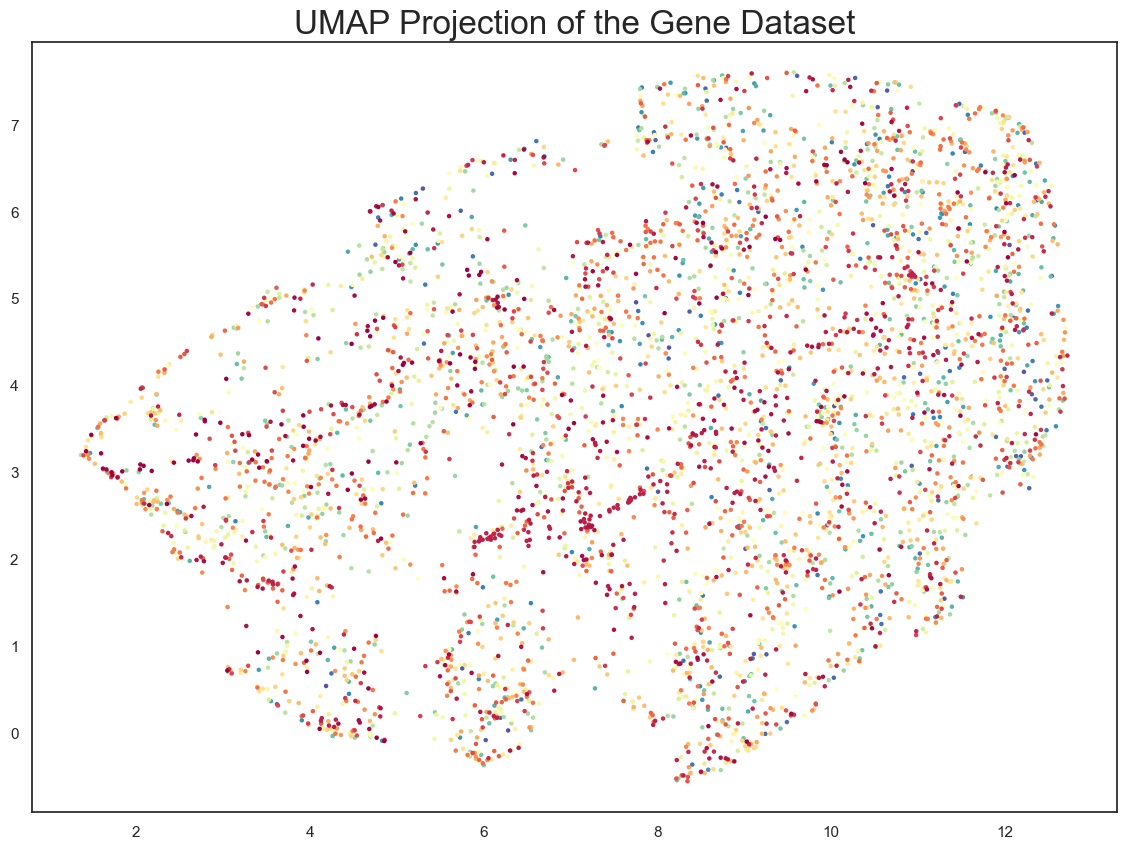

In [71]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

plt.scatter(embedding[:, 0], embedding[:, 1], c=genes.clusterID, cmap='Spectral', s=5) #customizing the graph aesthetics
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP Projection of the Gene Dataset', fontsize=24);
plt.savefig('UMAP.png', bbox_inches = 'tight')

This is the graph generated by using the UMAP package. It is supposed to differentiate between population subsets... if successful!
***